<a href="https://colab.research.google.com/github/joaoVittorDevv/fraud-detection-/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [ ]:
PATH = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

df = pd.read_csv(PATH)

df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Aqui estamos verificando através do comando `info()` as informações basicas sobre o dataset, como numero de colunas, tipo de dados, quantidade de dados nulos, entre outras informações.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

O código abaixo exibe a quantidade em porcentagem de dados faltantes de cada coluna.

In [ ]:
100*(df.isna().sum()/df.shape[0])

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

Abaixo temos alguns gráficos sobre a variável ***Time*** (*Ela representa o número de segundos decorridos entre esta transação e a primeira transação no banco de dados*).

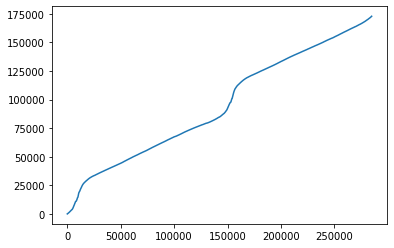

In [ ]:
df.Time.plot(kind='line')

Para entender se existe alguma relação entre a detecção de uma fraude e o momento da descoberta, vamos criar um grafico onde o ***eixo x*** representa a linha do tempo dos acontecimentos, e o ***eixo y*** corresponde a ser uma fraude ou não. Estamos buscando pontos do ***eixo x*** onde existam valores agrupados, afim de encontrar um padrão de horário em que existem mais tentativas de fraude.

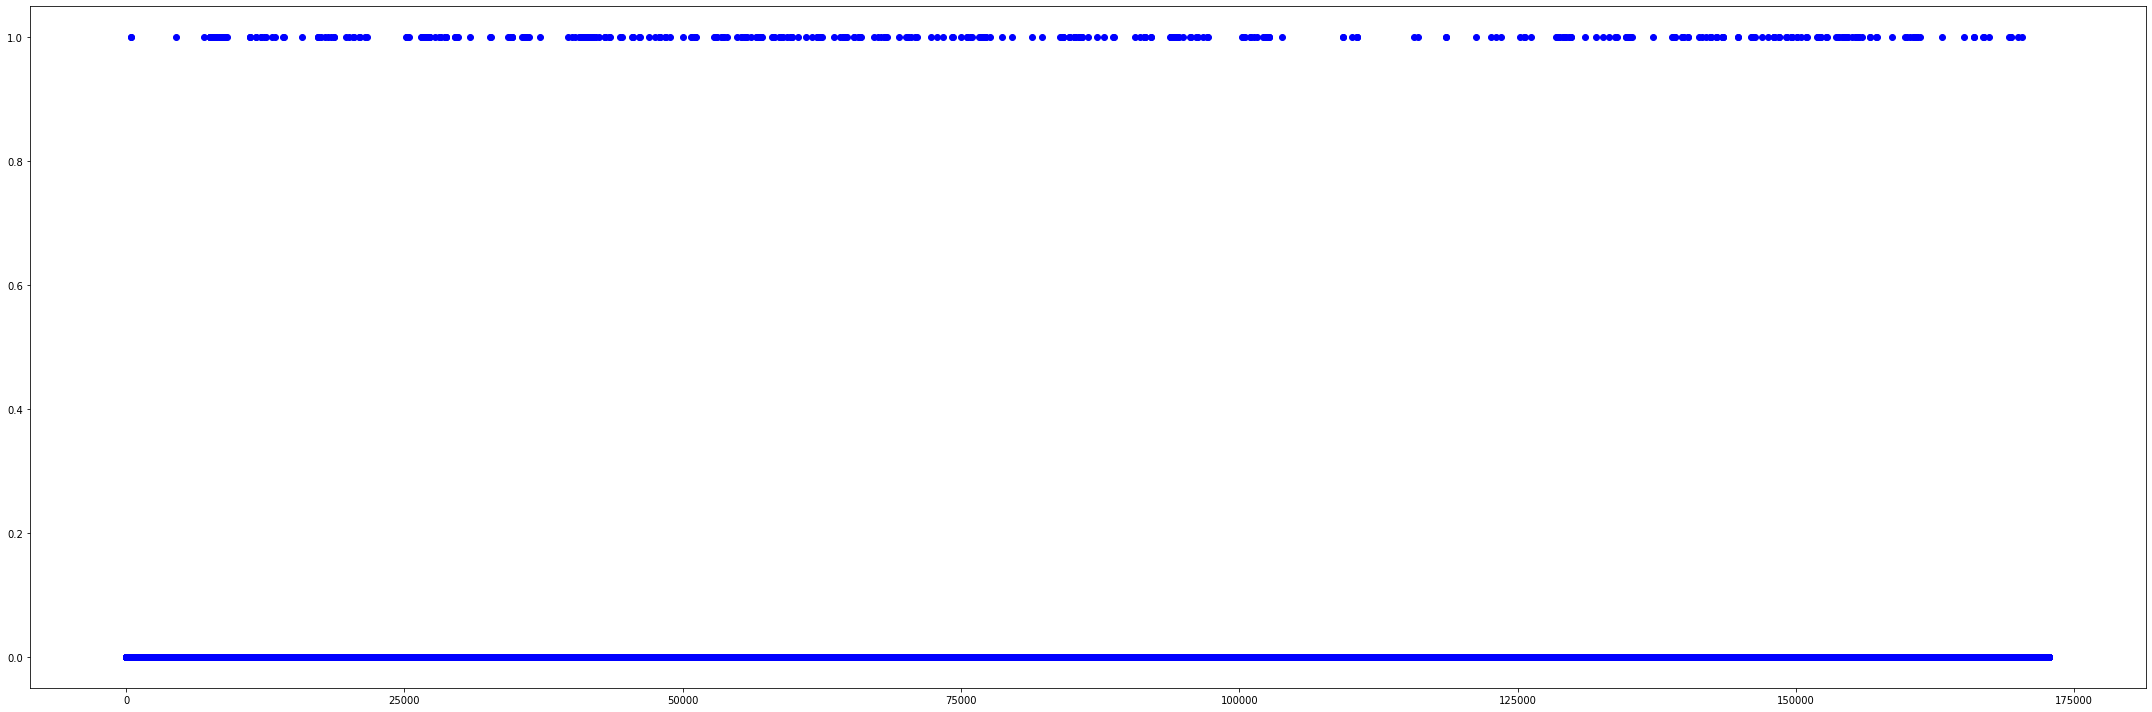

In [ ]:
fig, ax = plt.subplots(figsize = (30,10))

ax.plot(df.Time, df.Class, 'bo')

plt.tight_layout()

Após observar o gráfico acima, podemos entender que não existe um agrupamento de tentativa de fraudes em horários específicos.

Uma vez que não conseguimos identificar um horário padrão na tentativa de fraude, iremos plotar dois histogramas, um referente a variável `Time` para identificar os momentos em que existe uma maior movimentação, e outro referente a variável `Amount`, para entender a como esta distribuído o valor das movimentações.

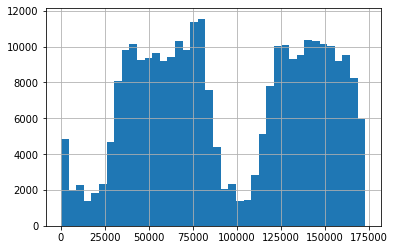

In [ ]:
df.Time.hist(bins=40)

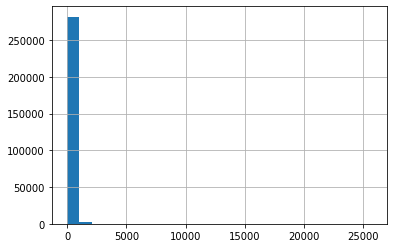

In [ ]:
df.Amount.hist(bins=25)

A variável ***Time*** apresenta uma curva bem definida, com picos de movimentação durante o dia e uma queda durante o período da noite.

In [ ]:
df.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Já a variável ***Amount***, possui a maior parte dos valores entre 0 e 77.165, porém, o valor máximo que ela possui, é 25691.160, o que significa um grande outlier nos dados.

Sabendo desses outliers, iremos verificar qual a incidencia deles em tentativas de fraude através de um boxplot

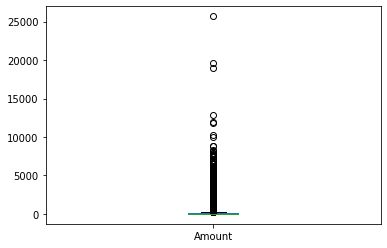

In [ ]:
df_fraude = df.loc[df.Class == 0]
df_fraude.Amount.plot(kind='box')

Fica evidente que existe um grande numero de outliers quando estamos olhando apenas para as **tentativas de fraude**, portando podemos entender que as tentativas de golpe **tem uma grande relação com os outliers**.

Para observar melhor essa relação, iremos plotar um gráfico de correlação entre todas as variáveis.

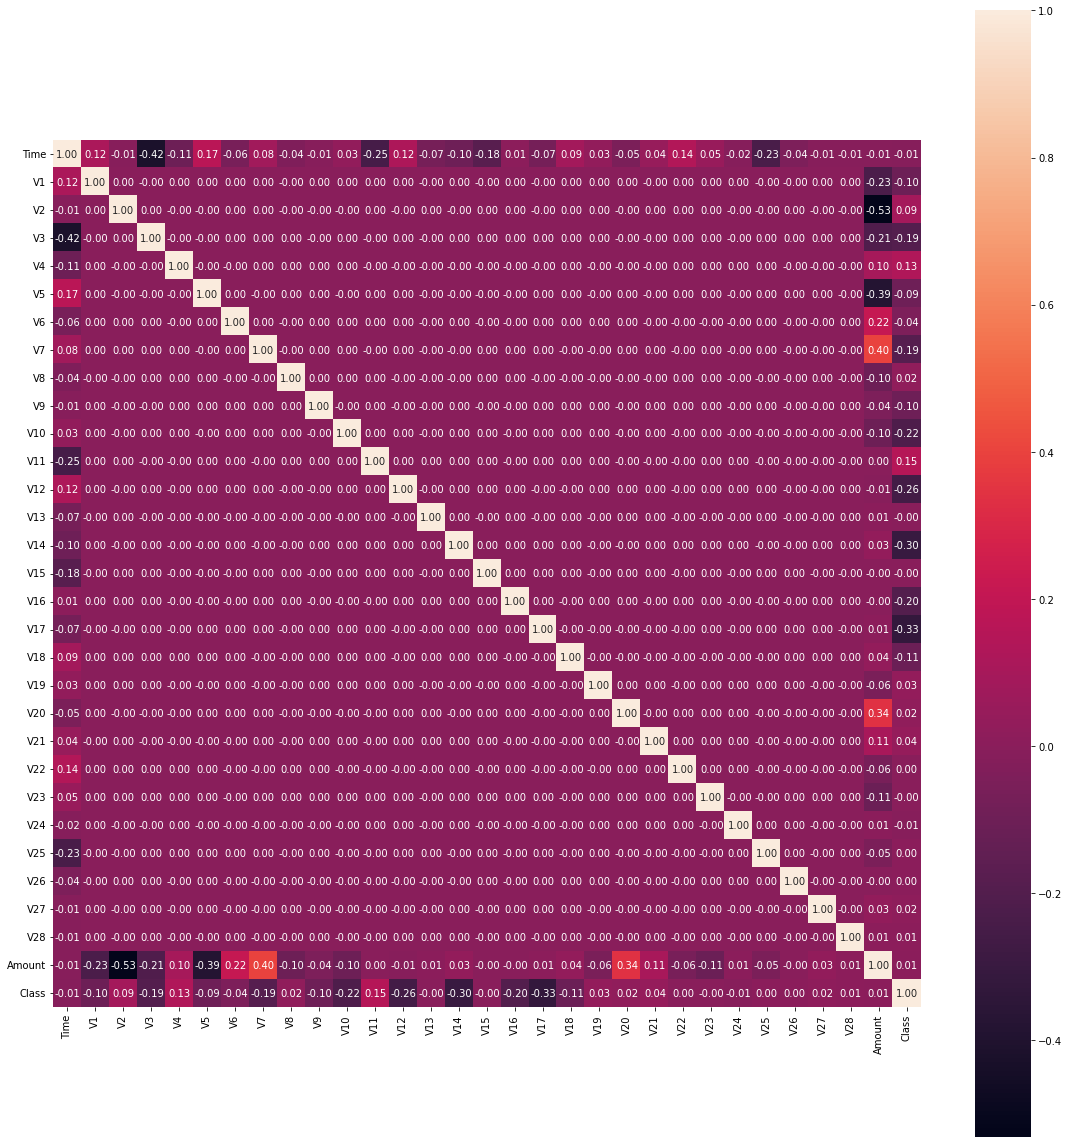

In [ ]:
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(16, 16))

sns.heatmap(df_corr, fmt='.2f', square=True, linecolor='white', vmax=1.0, annot=True);

plt.tight_layout()

Ao observar o gráfico, é muito difícil ter alguma correlação de fato conclusiva, devido ao grande número de variáveis PCA `[V1, V2, V3 ..., V28]`, assim como, não existir nenhum valor alto de correlação no gráfico. Contudo, devemos lembrar que os dados PCA, já foram padronizados previamente.

Abaixo temos a contagem do número de fraudes detectadas no dataset e o número de não fraudes, podemos observar que existe uma diferença gigante entre os dois valores, sendo necessário um balanceamento dos dados, para tornar as proporções do dataset equilibradas.

In [ ]:
df.groupby('Class').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492


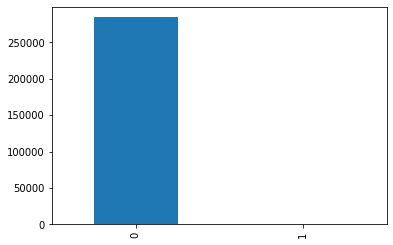

In [ ]:
df.Class.value_counts().plot(kind='bar')

## Análise Exploratória

Abordar tópicos/informações como:

* Ver as 5 primeiras entradas
* Ver o resumo estatístico do dataframe
* Verificar se há valores ausentes
* Plotar um gráfico de barras (ou countplot) para ver o balanceamento do *dataset*
* Plotar os seguintes histogramas:
    * Variável `Time`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
    * Variável `Amount`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
* Plotar um `boxplot` para a variável `Amount` quando houve fraude (`Class == 1`)
* Plotar uma matriz de correlação

## Preparação dos Dados

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e validação
* [*Recomendado*] Balancear o conjunto de dados

## Modelo de Machine Learning

* Construir um modelo para **classificação**.
* [*Opcional*] Construir mais de um modelo para avaliar os desempenhos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

Após importar as bibliotecas que iremos utilizar, seguiremos para a normalização das variáveis que ainda não foram padronizadas (`Time`, `Amount`). Para isso, utilizaremos a função `MinMaxScaler()` do **sklearn**, o que ela faz é basicamente dimensionar os dados da variável para um determinado intervalo.

In [ ]:
min_max = MinMaxScaler()
time = min_max.fit_transform(df['Time'].values.reshape(-1, 1))
amount = min_max.fit_transform(df['Amount'].values.reshape(-1, 1))
con = np.concatenate((time, amount), axis=1)
df_2 = pd.DataFrame(con, columns=['time_norm', 'amount_norm'])
df = pd.concat(objs=[df_2, df], join='outer',axis=1)
df.drop(labels=['Time', 'Amount'], axis=1, inplace=True)
df

,time_norm,amount_norm,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.000000,0.005824,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,0.000000,0.000105,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,0.000006,0.014739,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.000006,0.004807,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.000012,0.002724,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,0.000030,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,0.999971,0.000965,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,0.999977,0.002642,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,0.999977,0.000389,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


Concluída a normalização dos dados, podemos prosseguir com as etapas de preparação dos dados e do modelo, na célula abaixo estão sendo instanciadas **duas funções**. A `LogisticRegression()` que nada mais é do que a definição do modelo a ser utilizado para classificação - *mais adiante sera instanciado um modelo de árvore de decisão* - e a função `StratifiedKFold()`, onde estamos definindo que tipo de modelo iremos utilizar na validação cruzada.

In [ ]:
model = LogisticRegression()
cv = StratifiedKFold(n_splits = 10, shuffle=True)


Após a separação de features e targets, estamos definindo a função `NearMiss()`, que é responsável pelo balanceamento dos dados:

> [NearMiss](https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.NearMiss.html#imblearn.under_sampling.NearMiss)-1 selects the positive samples for which the average distance to the N closest samples of the negative class is the smallest.

Basicamente, o NearMiss cria classes para o dataset e remove aleatoriamente os dados das classes majoritárias, se, por exemplo, tivermos duas classes próximas, o algoritmo irá identificá-las e remover dados da classe que for maior, aumentando assim a distância entre elas.

In [ ]:
X = df.drop(columns=['Class'], axis = 1)
Y = df['Class']

nm = NearMiss(version=1)
x_nm, y_nm = nm.fit_resample(X, Y)

x_train, x_test, y_train, y_test = train_test_split(x_nm, y_nm)

Com os dados balanceados e separados entre treino e teste, chegou a hora de criar uma função para medir o **intervalo de acurácia** do nosso modelo na validação cruzada e instanciar mais um **modelo para testar**, que no caso vai ser o `DecisionTreeClassifier()`.

Para o intervalo de acurácia, definimos a função `intervalo()`, que recebe como argumento o resultado do modelo e calcula a média de precisão e o intervalo em que ela pode ocorrer - *considerando o desvio padrão* - e retorna o resultado do modelo.

Dentro do loop for esta sendo instanciado o `DecisionTreeClassifier()`, o motivo pelo qual estamos fazendo dessa forma, é para com apenas um comando, conseguir testar mais de um `max_depth` da árvore com menos código.


In [ ]:
def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))

for a in range(3,10):
  model_tree = DecisionTreeClassifier(max_depth=a)
  results = cross_val_score(model_tree, x_train, y_train, cv = cv)
  print('Decision tree {}'.format(a))
  intervalo(results)


results = cross_val_score(model, x_train, y_train, cv = cv)
print('LogisticRegression')
intervalo(results)


Decision tree 3
Acurácia média: 94.03%
Intervalo de acurácia: [90.14% ~ 97.93%]
Decision tree 4
Acurácia média: 93.63%
Intervalo de acurácia: [86.55% ~ 100.70%]
Decision tree 5
Acurácia média: 93.22%
Intervalo de acurácia: [87.54% ~ 98.91%]
Decision tree 6
Acurácia média: 93.09%
Intervalo de acurácia: [88.83% ~ 97.35%]
Decision tree 7
Acurácia média: 94.04%
Intervalo de acurácia: [89.50% ~ 98.58%]
Decision tree 8
Acurácia média: 93.90%
Intervalo de acurácia: [88.57% ~ 99.23%]
Decision tree 9
Acurácia média: 94.99%
Intervalo de acurácia: [89.40% ~ 100.57%]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression
Acurácia média: 94.30%
Intervalo de acurácia: [87.86% ~ 100.73%]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Observando o resultado da validação cruzada e dos testes de acurácia e intervalo, podemos observar que todos os modelos de árvore de decisão e o modelo de regressão logística, possuem um **comportamento e uma precisão muito semelhante**.

A escolha pelo modelo de **árvore de decisão**, com `max_depth=7` - *uma profundidade máxima de 7 nós* - se deu pelo intervalo de acurácia possuir um range menor em relação aos demais testados.

Abaixo, estamos instanciando o modelo, treinando-o e executando as previsões em cima dos dados de teste. Também estamos utilizando a função `classification_report()`, a qual retorna um relatório com as **principais métricas utilizadas**.

In [ ]:
model_tree = DecisionTreeClassifier(max_depth=7)
model_tree.fit(x_train, y_train)
y_predict_tree = model_tree.predict(x_test) 
print('Descision Tree com {} nós'.format(model_tree.max_depth))
print(classification_report(y_test, y_predict_tree))

Descision Tree com 7 nós
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       124
           1       0.96      0.97      0.96       122

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246



## Avaliar o desempenho do modelo

Para fazer a avaliação de desempenho, iremos utilizar primeiramente a matriz de confusão. Plotando-a em um heatmap, podemos observar que o número de *falso positivo* e *falso negativo* é muito menor em relação ao *verdadeiro positivo* e *falso verdadeiro*.

Text(0.5, 51.0, 'Previsto')

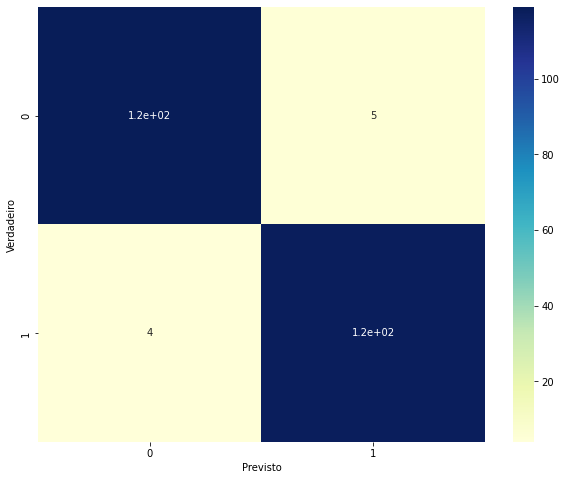

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(confusion_matrix(y_test, y_predict_tree), annot=True, ax=ax, cmap="YlGnBu");

ax.set_ylabel('Verdadeiro')
ax.set_xlabel('Previsto')

Sabe-se que os algoritmos de classificação, baseiam suas previsões em probabilidade, abaixo, iremos utilizar a função `predict_proba()` para entender como isso funciona.

A variável `y_prob` representa qual a probabilidade de ser cada uma das opções possíveis, em seguida é exibido na tela o resultado que o algoritmo previu e as probabilidades definidas em `y_prob`.

In [ ]:
y_prob = model_tree.predict_proba(x_test)

print("y_pred: \n", y_predict[0:5])
print("\ny_proba: \n", y_prob[0:5])

y_pred: 
 [0 1 0 0 1]

y_proba: 
 [[0.97289973 0.02710027]
 [0.         1.        ]
 [0.97289973 0.02710027]
 [0.97289973 0.02710027]
 [0.         1.        ]]


## Conclusão

Após todo o processo de exploração dos dados, normalização, definição de modelos, validação cruzada, escolha do modelo, previsão e avaliação dos resultados, podemos concluir que o algoritmo de árvore de decisão teve um resultado extremamente satisfatório, tanto pelos testes de validação cruzada, quanto pelo resultado de previsão.

Devido aos testes realizados antes da escolha do modelo, podemos entender que a probabilidade de *overfitting* é baixa, mesmo com um score superior a 90%, o fato dos dados importados já terem passado por uma preparação prévia e ser um conjunto utilizado para estudos, também corrobora com a premissa de uma baixa chance de overfitting.
